# Images for Presentation on March 5, 2018

## Phase Problem Recap

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_context("notebook", font_scale=1.5)
import numpy as np
import phase_mixing_utils
import phase_retrieval
from scipy.ndimage import filters
from skimage import color
from skimage.transform import resize

In [23]:
# Ring structure
def_uc = 100
rings = phase_mixing_utils.rings()
ft_rings = np.fft.fft2(rings)

uc = rings[:100,:100]
uc = (uc - uc.min()) / (uc.max() - uc.min())
ft_rings = np.fft.fft2(uc)
mags = phase_mixing_utils.get_mag(ft_rings)
phases = phase_mixing_utils.get_phase(ft_rings)

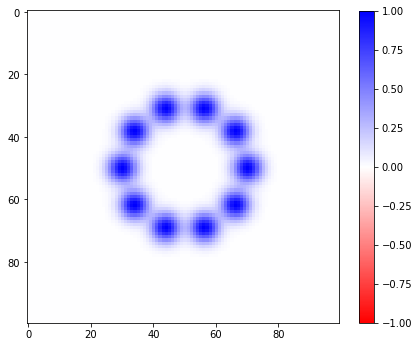

In [3]:
plt.figure(figsize=(7, 7))
plt.imshow(uc, cmap='bwr_r', vmin=-1, vmax=1)
plt.colorbar(shrink=0.82)

In [4]:
def fourier_MSE(guess, reference): 
    """MSE in Fourier domain"""
    abs_err = np.sum((np.abs(guess) - np.abs(reference))**2)
    norm = np.sum(np.abs(reference)**2)
    return abs_err/norm

def inputoutput(mags, guess=None, n_iters=1000, beta=0.3, freq=0.5):
    """
    Implementation of the input-output phase retrieval algorithm from 
    Fienup JR, Optics Letters (1978). 
    
    Parameters
    ----------
    mags : np.ndarray
        Array of magnitudes in Fourier space (modulus of Fourier transform)
    n_iters : int
        Number of iterations to run algorithm
    beta : float
        Scaling factor for updates to negative real-space components in iteration 
        of input-output algorithm
    freq : float
        Switching frequency between input-output updates to real-space density and
        error-reduction updates. If 1.0, input-output updates are always used. If
        0.0, negative real-space values are zeroed out at every iteration. (Default 
        value is 0.5)
        
    Returns
    -------
    (rs_track, error_track)
        The first array contains the estimate of the real-space density at each iteration.
        The second array contains the Fourier domain mean-squared error at each iteration.
    """
    # Initialize with guess if provided. Otherwise, generate random starting guess.
    shape = list(mags.shape)
    if guess is None:
        rs_const = np.random.random_sample(shape)
    else:
        assert guess.shape == mags.shape
        rs_const = guess
        
    rs_track  = np.zeros([n_iters+1] + shape)
    rs_track[0]= rs_const
    err_track = np.zeros(n_iters)
    pre_dm = np.zeros([n_iters] + shape)
    
    for i in range(n_iters):
        
        ft = np.fft.fft2(rs_const)
        err_track[i] = fourier_MSE(ft, mags)
        
        # Mix known magnitudes and guessed phases
        ks_est = mags*np.exp(1j*phase_mixing_utils.get_phase(ft))
        
        # Inverse fourier transfrom your phase guess with the given magnitudes
        rs_est = np.fft.ifft2(ks_est)
        
        # Impose desired real-space density constraint
        gamma  = np.real(rs_est) > 0 # Mask of negative density
        pre_dm[i] = rs_est
        if np.random.rand() < 0.5:
            # Input-Output update
            rs_const = np.abs(rs_est*gamma - (rs_est*(~gamma)*beta)) 
        else:
            # Error-Reduction update
            rs_const = np.abs(rs_est*gamma)
        rs_track[i+1] = rs_const
    
    return rs_track, pre_dm, err_track

/Users/jgreisman/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:59: ComplexWarning: Casting complex values to real discards the imaginary part


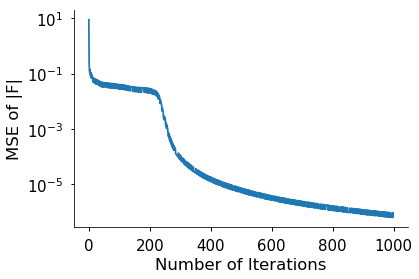

In [28]:
rstrack, pre_dm, err_track = inputoutput(mags, beta=0.2)
plt.semilogy(err_track)
plt.ylabel(r"MSE of |F|")
plt.xlabel(r"Number of Iterations")
sns.despine()
plt.show()

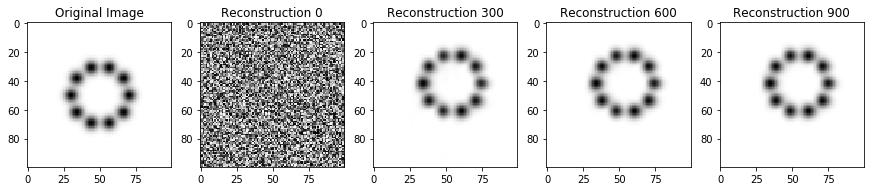

In [15]:
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
ax[0].imshow(uc, cmap='gray_r')
ax[0].set_title("Original Image")
for i in range(4):
    ax[i+1].imshow(rstrack[i*300], cmap='gray_r')
    ax[i+1].set_title("Reconstruction %d" %(i*300))

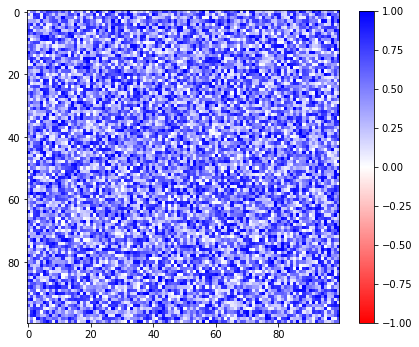

In [16]:
plt.figure(figsize=(7, 7))
plt.imshow(rstrack[0], cmap='bwr_r', vmin=-1, vmax=1)
plt.colorbar(shrink=0.82)

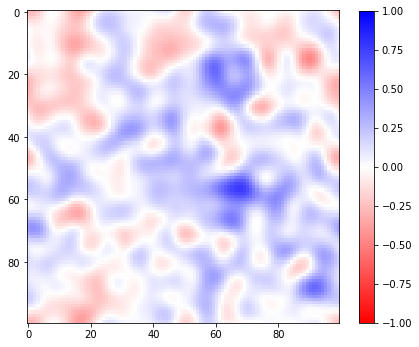

In [17]:
plt.figure(figsize=(7, 7))
plt.imshow(pre_dm[0], cmap='bwr_r', vmin=-1, vmax=1)
plt.colorbar(shrink=0.82)

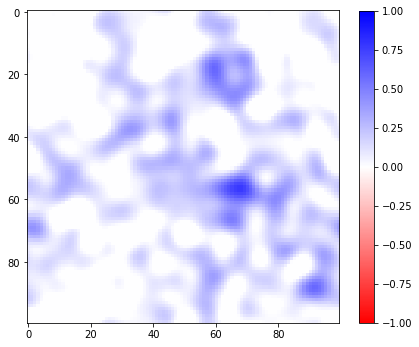

In [18]:
plt.figure(figsize=(7, 7))
plt.imshow(rstrack[1], cmap='bwr_r', vmin=-1, vmax=1)
plt.colorbar(shrink=0.82)

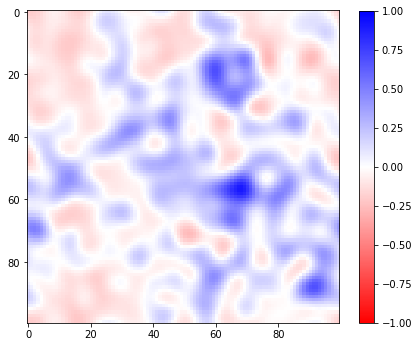

In [19]:
plt.figure(figsize=(7, 7))
plt.imshow(pre_dm[1], cmap='bwr_r', vmin=-1, vmax=1)
plt.colorbar(shrink=0.82)

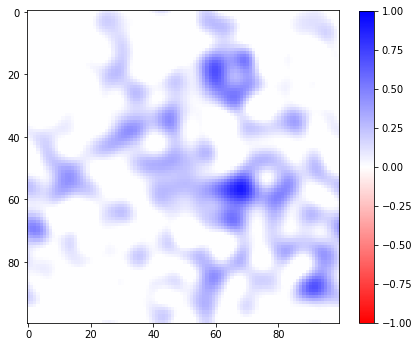

In [20]:
plt.figure(figsize=(7, 7))
plt.imshow(rstrack[2], cmap='bwr_r', vmin=-1, vmax=1)
plt.colorbar(shrink=0.82)

In [25]:
for i, img in enumerate(rstrack[:500:1]):
#     plt.imshow(img, cmap="gray_r")
#     plt.title("Iteration %d" %(i*1))
#     plt.savefig("movie/img%04d.png" %i)
    fig, axs = plt.subplots(1, 2, figsize=(14, 7))
    axs[0].imshow(uc, cmap="gray_r")
    axs[0].set_title("Target")
    axs[1].imshow(img, cmap="gray_r")
    axs[1].set_title("Iteration %d"%(i))
    plt.savefig("movie/img%04d.png" %i)
    plt.close()

In [4]:
duck = plt.imread("Images/duck.png")
duck = np.abs(color.rgb2gray(duck)[75:175, 75:175] - 1)
duck = (duck - duck.min()) / (duck.max() - duck.min())

In [20]:
us_duck = resize(duck,(300,300))

/Users/johnrussell/anaconda/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


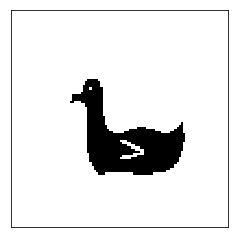

In [18]:
duck.max()
flipduck = np.flipud(duck)
plt.imshow(duck,cmap="Greys")
plt.xticks([])
plt.yticks([])
plt.savefig("Images/disp_duck.png",dpi=600)
plt.show()

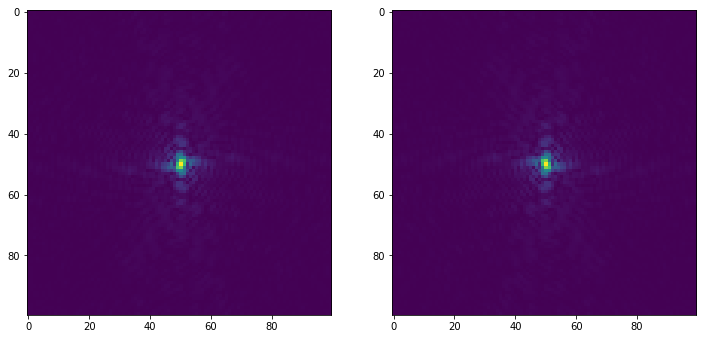

In [7]:
duckfft = np.fft.fft2(duck)
mags = phase_mixing_utils.get_mag(duckfft)
mags_flip = phase_mixing_utils.get_mag(np.fft.fft2(flipduck))
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(np.fft.fftshift(mags))
axs[1].imshow(np.fft.fftshift(mags_flip))

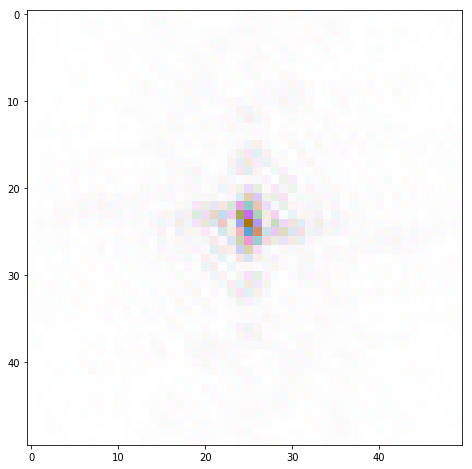

In [19]:
phase_mixing_utils.phase_intensity_plot(np.fft.fftshift(duckfft)[25:75,25:75],cb=False)

In [21]:
us_fft = np.fft.fft2(us_duck)

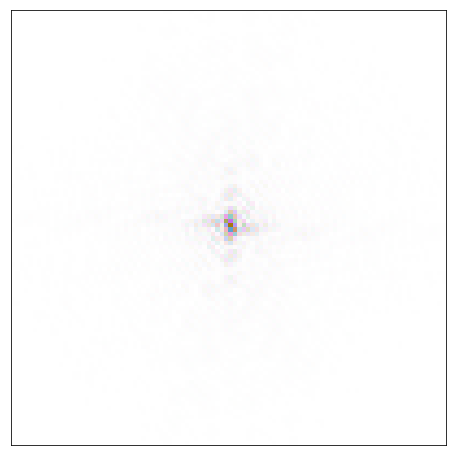

In [33]:
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks([])
plt.yticks([])
phase_mixing_utils.phase_intensity_plot(np.fft.fftshift(us_fft)[100:200,100:200],ax=ax,cb=False)
plt.savefig("Images/fourier_duck.png",dpi=600)

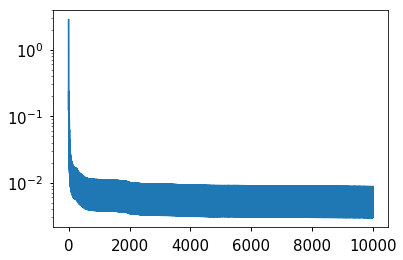

In [128]:
rstrack, errtrack = phase_retrieval.inputoutput(mags, beta=0.7, n_iters=10000)
plt.semilogy(errtrack)

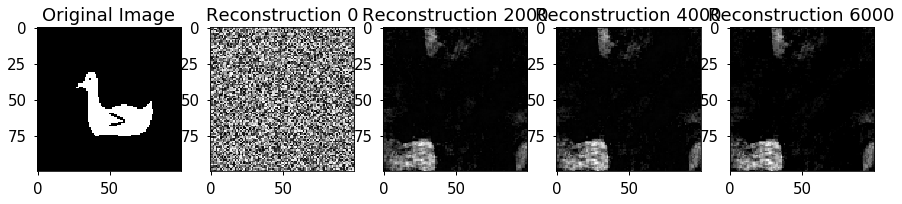

In [129]:
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
ax[0].imshow(duck, cmap='gray')
ax[0].set_title("Original Image")
for i in range(4):
    ax[i+1].imshow(rstrack[i*2000], cmap="gray")
    ax[i+1].set_title("Reconstruction %d" %(i*2000))

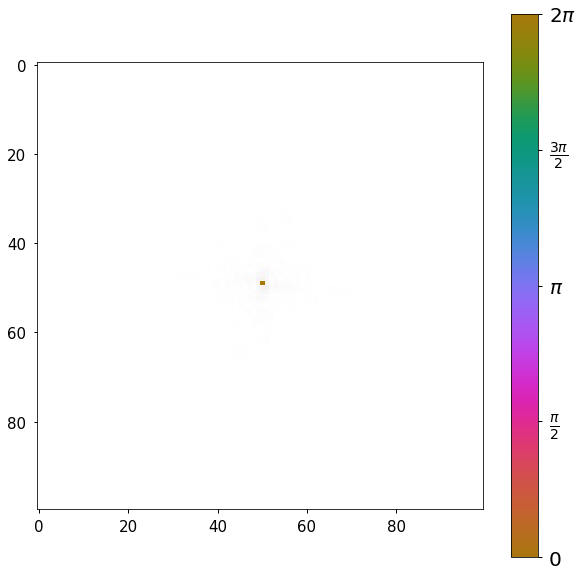

In [60]:
phase_mixing_utils.phase_intensity_plot(np.fft.fftshift(duckfft))

# Blur the duck

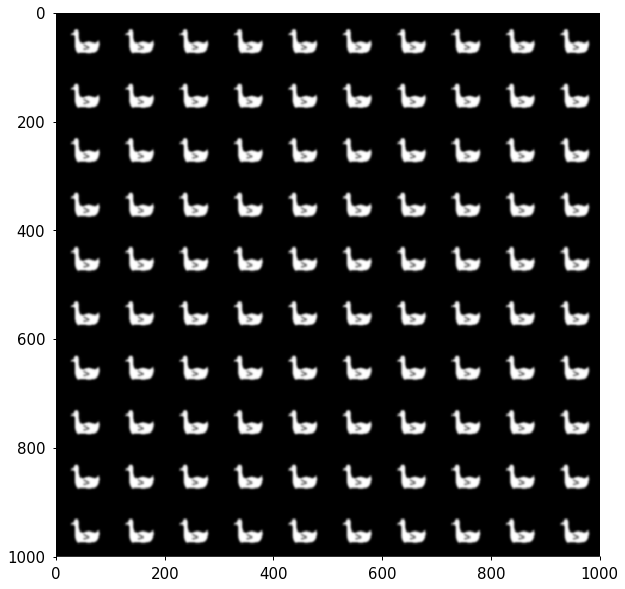

In [259]:
blurryduck = filters.gaussian_filter(duck, [2.0, 2.0])
blurryduckarmy = np.tile(blurryduck, [10, 10])
plt.figure(figsize=(10, 10))
plt.imshow(blurryduckarmy, cmap='gray')
sns.despine()

In [260]:
blurryfft = np.fft.fft2(blurryduckarmy)
mags = phase_mixing_utils.get_mag(blurryfft)

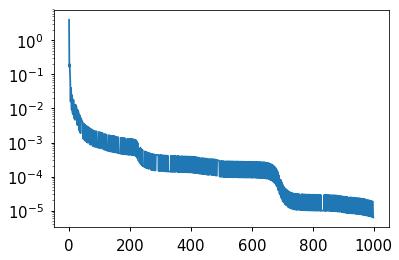

In [262]:
rstrack, errtrack = phase_retrieval.inputoutput(mags, beta=0.7, n_iters=1000)
plt.semilogy(errtrack)

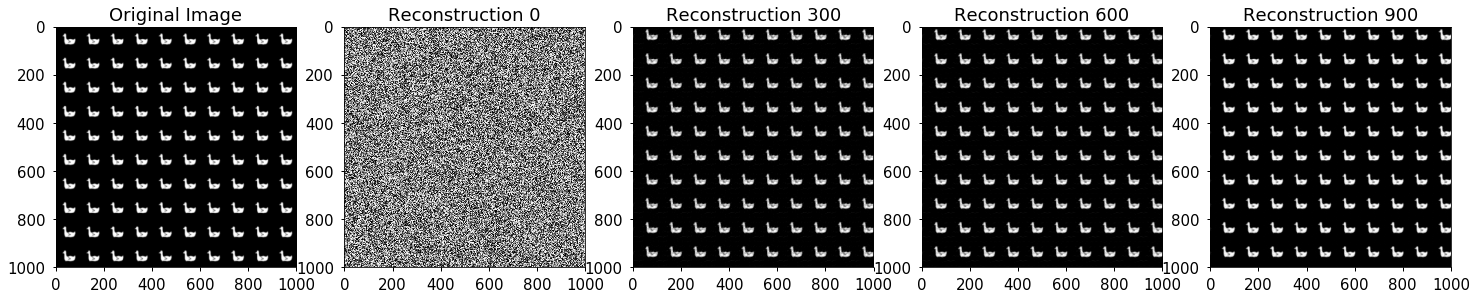

In [263]:
fig, ax = plt.subplots(1, 5, figsize=(25, 5))
ax[0].imshow(blurryduckarmy, cmap='gray')
ax[0].set_title("Original Image")
for i in range(4):
    ax[i+1].imshow(rstrack[i*300], cmap="gray")
    ax[i+1].set_title("Reconstruction %d" %(i*300))

(100, 100)

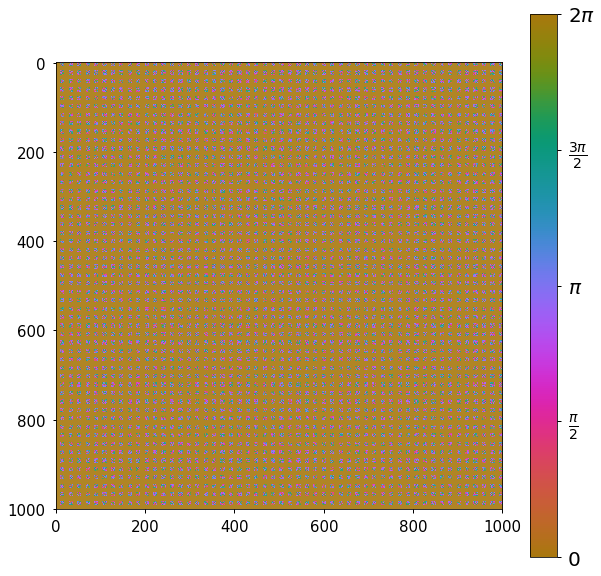

In [264]:
phase_mixing_utils.phase_intensity_plot(np.fft.fftshift(blurryfft), min_alpha=0.9)

# Test smiley face

0.0 0.495660769931 (150, 150)


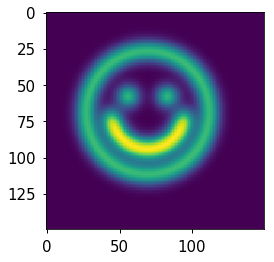

In [270]:
smileypad = np.zeros((150, 150))
smiley = plt.imread("smiley.png")
smileypad[25:115, 25:115] = np.abs(color.rgb2gray(smiley)-1)
smiley = filters.gaussian_filter(smileypad, [5.0, 5.0])
plt.imshow(smiley)
print smiley.min(), smiley.max(), smiley.shape

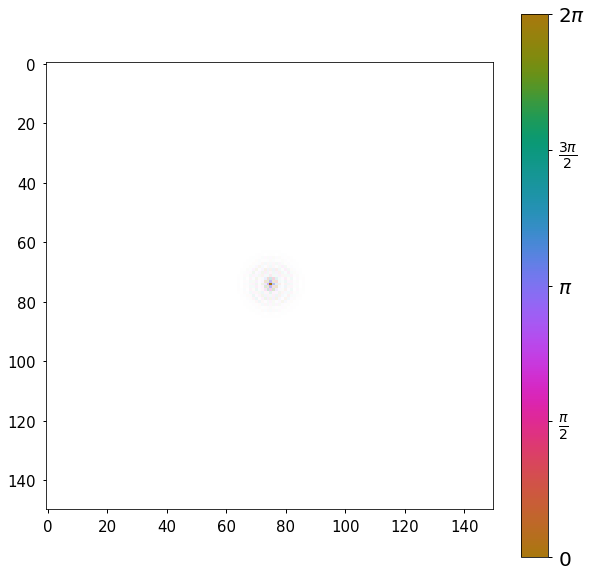

In [271]:
smileyfft = np.fft.fft2(smiley)
smileymags = phase_mixing_utils.get_phase(smileyfft)
phase_mixing_utils.phase_intensity_plot(np.fft.fftshift(smileyfft))

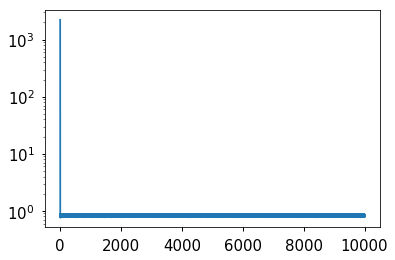

In [195]:
rstrack, errtrack = phase_retrieval.inputoutput(smileymags, beta=0.5, n_iters=10000)
plt.semilogy(errtrack)

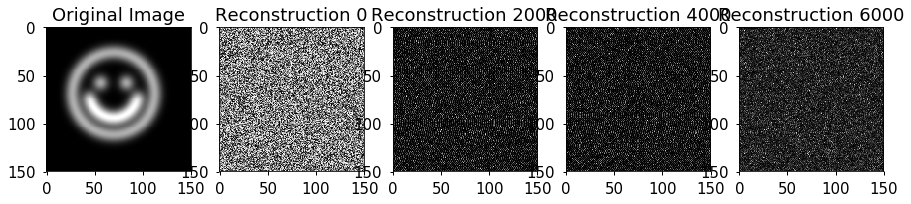

In [196]:
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
ax[0].imshow(smiley, cmap='gray')
ax[0].set_title("Original Image")
for i in range(4):
    ax[i+1].imshow(rstrack[i*2000], cmap="gray")
    ax[i+1].set_title("Reconstruction %d" %(i*2000))